In [1]:
using SerialPorts
const PORT = "COM17"  
# Open the serial port
port = SerialPort(PORT, 115200)

SerialPort("COM17", 115200, 8, "N", 1, nothing, false, false, false, PyObject Serial<id=0x238748086d0, open=True>(port='COM17', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, dsrdtr=False))

close(port)

In [16]:
close(port)

SerialPort("COM17", 115200, 8, "N", 1, nothing, false, false, false, PyObject Serial<id=0x238748086d0, open=False>(port='COM17', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, dsrdtr=False))

In [17]:
port = SerialPort(PORT, 115200)

SerialPort("COM17", 115200, 8, "N", 1, nothing, false, false, false, PyObject Serial<id=0x23874c2aef0, open=True>(port='COM17', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, dsrdtr=False))

In [57]:

#while bytesavailable(port) > 0
#    sleep(0.1);
#    num = readavailable(port);
#end

write(port, 65);
num1 = bytesavailable(port);
word = read(port, 6);
num2 = bytesavailable(port);
HeaderHex = Vector{UInt8}(word);
Header = zeros(4);
print(HeaderHex);

#Reconstructing the Header bytes
Header[1] = (2^8)*HeaderHex[1] + HeaderHex[2];
Header[2] = 0 + HeaderHex[3];
Header[3] = 0 + HeaderHex[4];
Header[4] = (2^8)*HeaderHex[5] + HeaderHex[6];
print(Header)

#Now receiving the data as needed
receivedBytes = 0;
data = Vector{UInt8}([]);
print("Arrived here :)")
while(receivedBytes < Header[1])
    receivedBytes = receivedBytes + bytesavailable(port);
    temp = readavailable(port);
    received = Vector{UInt8}(temp);
    append!(data, received);
end
print("Arrived here too :)")
numOfSamples = div(Int(Header[1]),2);
#Now turning the numbers back to decimal
recovered = zeros(div(Int(Header[1]),2))
for i in 1:div(Int(Header[1]),2)
    recovered[i] = (2^8)*data[2*i - 1] + data[2*i]
end

print("Time taken to sample in microseconds is: ", Header[4], "\n");
sample_rate = numOfSamples/(2*Header[4]*10^-6);
print("The sample rate is: ", sample_rate, "\n");
print(data)
print(num1, "\n");
print(num2);
print(recovered)

UInt8[0x1f, 0x40, 0x0c, 0x0c, 0x36, 0xbd][8000.0, 12.0, 12.0, 14013.0]Arrived here :)Arrived here too :)Time taken to sample in microseconds is: 14013.0
The sample rate is: 142724.61285948762
UInt8[0x07, 0x4b, 0x04, 0xf3, 0x05, 0x4a, 0x05, 0xa3, 0x05, 0xee, 0x0a, 0x13, 0x0a, 0xf2, 0x0a, 0x96, 0x0a, 0x42, 0x09, 0x91, 0x05, 0x2c, 0x05, 0x21, 0x05, 0x80, 0x05, 0xd0, 0x07, 0xe6, 0x0b, 0x01, 0x0a, 0xb7, 0x0a, 0x60, 0x0a, 0x18, 0x06, 0x26, 0x04, 0xfc, 0x05, 0x5d, 0x05, 0xb2, 0x06, 0x18, 0x0a, 0xaa, 0x0a, 0xdc, 0x0a, 0x80, 0x0a, 0x33, 0x08, 0x73, 0x04, 0xfd, 0x05, 0x38, 0x05, 0x93, 0x05, 0xdf, 0x09, 0x50, 0x0b, 0x00, 0x0a, 0xa2, 0x0a, 0x4f, 0x09, 0xfa, 0x05, 0x71, 0x05, 0x12, 0x05, 0x71, 0x05, 0xc4, 0x06, 0xd6, 0x0a, 0xef, 0x0a, 0xc6, 0x0a, 0x6d, 0x0a, 0x23, 0x07, 0x04, 0x04, 0xf2, 0x05, 0x4d, 0x05, 0xa5, 0x05, 0xec, 0x0a, 0x43, 0x0a, 0xed, 0x0a, 0x8f, 0x0a, 0x3d, 0x09, 0x61, 0x05, 0x1a, 0x05, 0x27, 0x05, 0x85, 0x05, 0xd3, 0x08, 0x40, 0x0a, 0xfe, 0x0a, 0xb1, 0x0a, 0x5b, 0x0a, 0x14, 0x05, 0xf2

In [3]:
using Plots
gr()

Plots.GRBackend()

# Plotting the recieved data

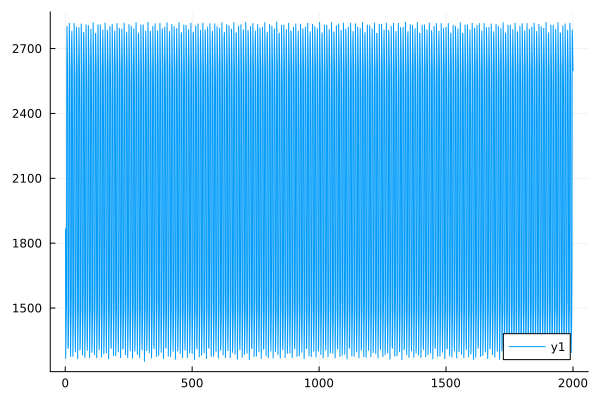

In [58]:
plot(recovered[1: Int(numOfSamples/2)])

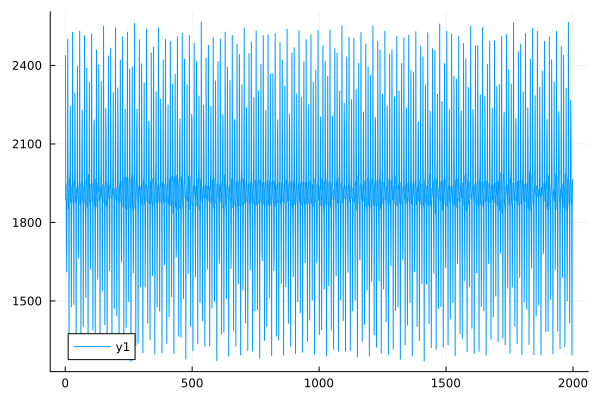

In [59]:
plot(recovered[Int(numOfSamples/2)+1: end])

In [61]:
p = plot(recovered[Int(numOfSamples/2)+1: Int(numOfSamples/2)+131], xlabel= "samples", ylabel = "adc Value", title = "Reciever amplified coil wave", legend = false)
savefig("amplified reciever coil wave.png")

"C:\\Users\\mulai\\Documents\\Mechatronics Final Year\\EEE4022S\\Julia comm with Arduino\\amplified reciever coil wave.png"

In [13]:
using FFTW
RECOVERED = fft(recovered[1:numOfSamples/2])
plot(fftshift(abs.(RECOVERED[2:numOfSamples/2])))

LoadError: ArgumentError: invalid index: 1.0 of type Float64

# Storing the data in a file

In [16]:
using CSV
using DataFrames
df = DataFrame(recovered=recovered)

CSV.write("data25Sept2.csv", df)

"data25Sept2.csv"

# Reading the CSV file for processing

In [3]:
using CSV
using DataFrames
# Replace "your_file.csv" with the path to your CSV file.
csv_file = "data14Sept2.csv"

# Read the CSV file into a DataFrame.
df = CSV.File(csv_file) |> DataFrame

# Access the first 5 rows of the DataFrame.
first(df, 500)


Row,recovered
,Float64
1,1963.0
2,1967.0
3,2007.0
4,2188.0
5,1949.0
6,1984.0
7,2083.0
8,1974.0
9,1970.0


In [62]:
# Convert the DataFrame to an array.
# data_array = Matrix(df)
data_array = recovered

4000-element Vector{Float64}:
 1867.0
 1267.0
 1354.0
 1443.0
 1518.0
 2579.0
 2802.0
 2710.0
 2626.0
 2449.0
 1324.0
 1313.0
 1408.0
    ⋮
 1956.0
 1965.0
 2268.0
 2159.0
 1882.0
 1872.0
 1869.0
 1293.0
 1851.0
 1952.0
 1955.0
 1964.0

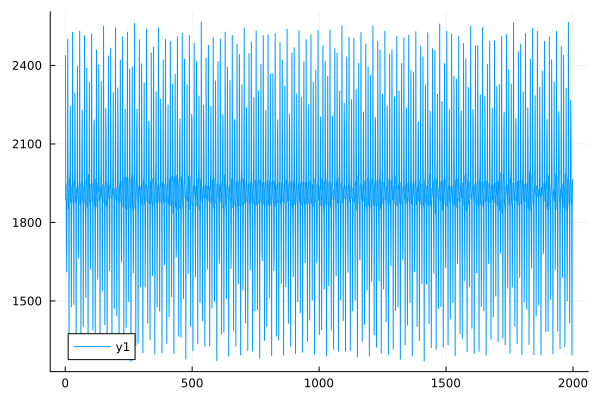

In [63]:
reciever_coil = data_array[Int(numOfSamples/2)+1:end];
transmitter_coil = data_array[1:numOfSamples];
plot(data_array[Int(numOfSamples/2)+1:end])

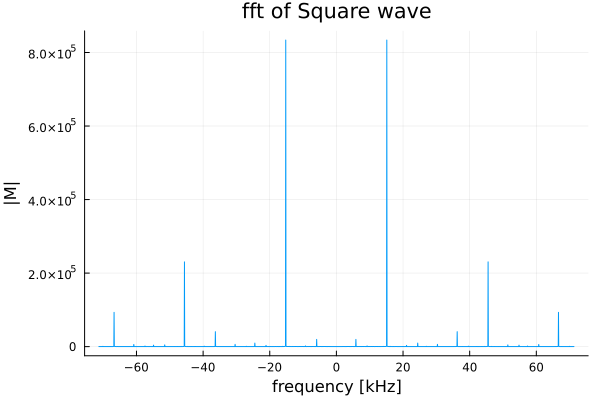

"C:\\Users\\mulai\\Documents\\Mechatronics Final Year\\EEE4022S\\Julia comm with Arduino\\fft of Square Wave.png"

In [64]:
using FFTW
# comment this out when writing the entire code
#NumOfSamples = 1000;
###########################################################
N = Int(numOfSamples/2);
Δf = sample_rate/(N)  # spacing in frequency domain


#create array of freq values stored in f_axis. 
if mod(N,2)==0    # case N even
    f_axis = (-N/2:N/2-1)*Δf;    
else   # case N odd
    f_axis = (-(N-1)/2 : (N-1)/2)*Δf; 
end
##########################################################



#Fs = sample_rate; #uncomment this line when running the entire code.
frequencies = f_axis/1000;  # Centered frequency axis in Hz

Reciever_coil = fft(data_array[1:N]);
Transmitter_coil = fft(data_array[N+1:end]);
fig = plot(frequencies[2:N], fftshift(abs.(Reciever_coil[2:N])), xlabel = "frequency [kHz]", ylabel = "|M|", title = "fft of Square wave", legend = false);
display(fig)
savefig("fft of Square Wave.png")

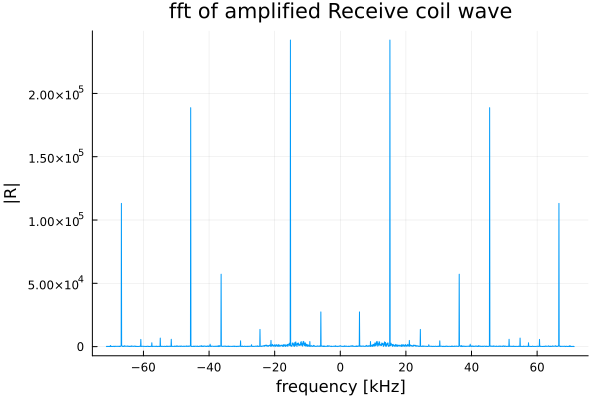

"C:\\Users\\mulai\\Documents\\Mechatronics Final Year\\EEE4022S\\Julia comm with Arduino\\amplified receive coil fft.png"

In [66]:
fig = plot(frequencies[2:N], fftshift(abs.(Transmitter_coil[2:end])),xlabel = "frequency [kHz]", ylabel = "|R|", title = "fft of amplified Receive coil wave", legend = false);
display(fig)
savefig("amplified receive coil fft.png")

# Display the transfer function

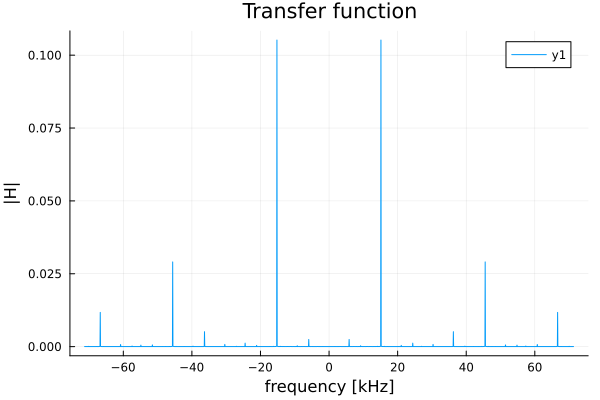

In [42]:
H = Reciever_coil/Transmitter_coil
fig = plot(frequencies[2:N], fftshift(abs.(H[2:N])), xlabel = "frequency [kHz]", ylabel = "|H|", title = "Transfer function");
display(fig)

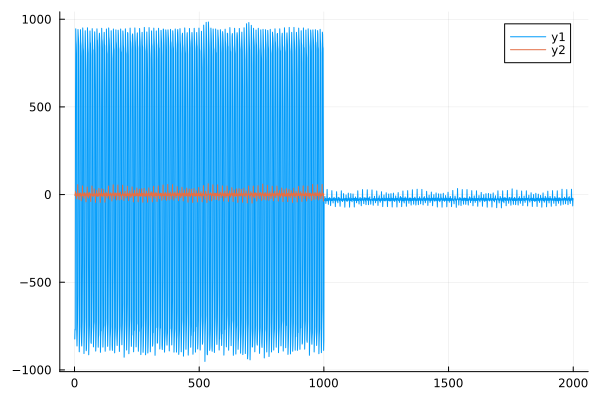

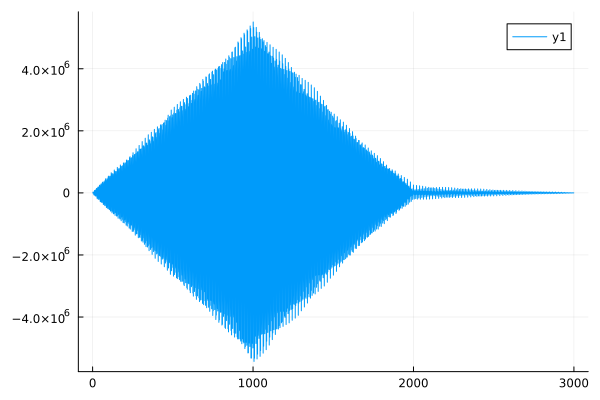

In [26]:
using Plots
using DSP
using Statistics

transmitter_coil = transmitter_coil .- mean(transmitter_coil)
reciever_coil    =  reciever_coil   .- mean(reciever_coil)

time_domain = plot(transmitter_coil .- mean(transmitter_coil));
time_domain = plot!(reciever_coil   .- mean(reciever_coil));
display(time_domain);

xcorr_result = xcorr(transmitter_coil, reciever_coil);
corr = plot(xcorr_result)
display(corr)

In [27]:
using DSP
using FFTW


# Compute the FFT
fft_result = fft(transmitter_coil)
fft_result2 = fft(reciever_coil)
# Get the magnitude and phase
magnitude = abs.(fft_result)
phase = angle.(fft_result)
phase2 = angle.(fft_result2)

fs = sample_rate/1000  # actual sampling frequency
frequency_of_interest1 = 15.2  # kHz
frequency_of_interest2 = 15.2  # kHz

index1 = Int(round(N * frequency_of_interest1 / fs))
index2 = Int(round(N * frequency_of_interest2 / fs))

#############
amplitude_at_freq1 = abs(fft_result[index1])
phase_at_freq1 = angle(fft_result[index1])*(180/pi)

amplitude_at_freq2 = abs(fft_result2[index2])
phase_at_freq2 = angle(fft_result2[index2])*(180/pi)

println("Amplitude at ", frequency_of_interest1, " kHz: ", amplitude_at_freq1)
println("Phase at ", frequency_of_interest1, " kHz: ", phase_at_freq1)
println("Amplitude at ", frequency_of_interest2, " kHz: ", amplitude_at_freq2)
println("Phase at ", frequency_of_interest2, " kHz: ", phase_at_freq2)


Amplitude at 15.2 kHz: 4555.787280899909
Phase at 15.2 kHz: -126.13558144011513
Amplitude at 15.2 kHz: 5310.380094216698
Phase at 15.2 kHz: -60.421905305665476
